# 1. Phylogenic Tree for FASTA Sequences

I generated a multiple sequence alignment (MSA) for every sequence using **Muscle** by Bob Edgar. The MSA was then used to generate a phylogenetic tree of the 48 given sequences.

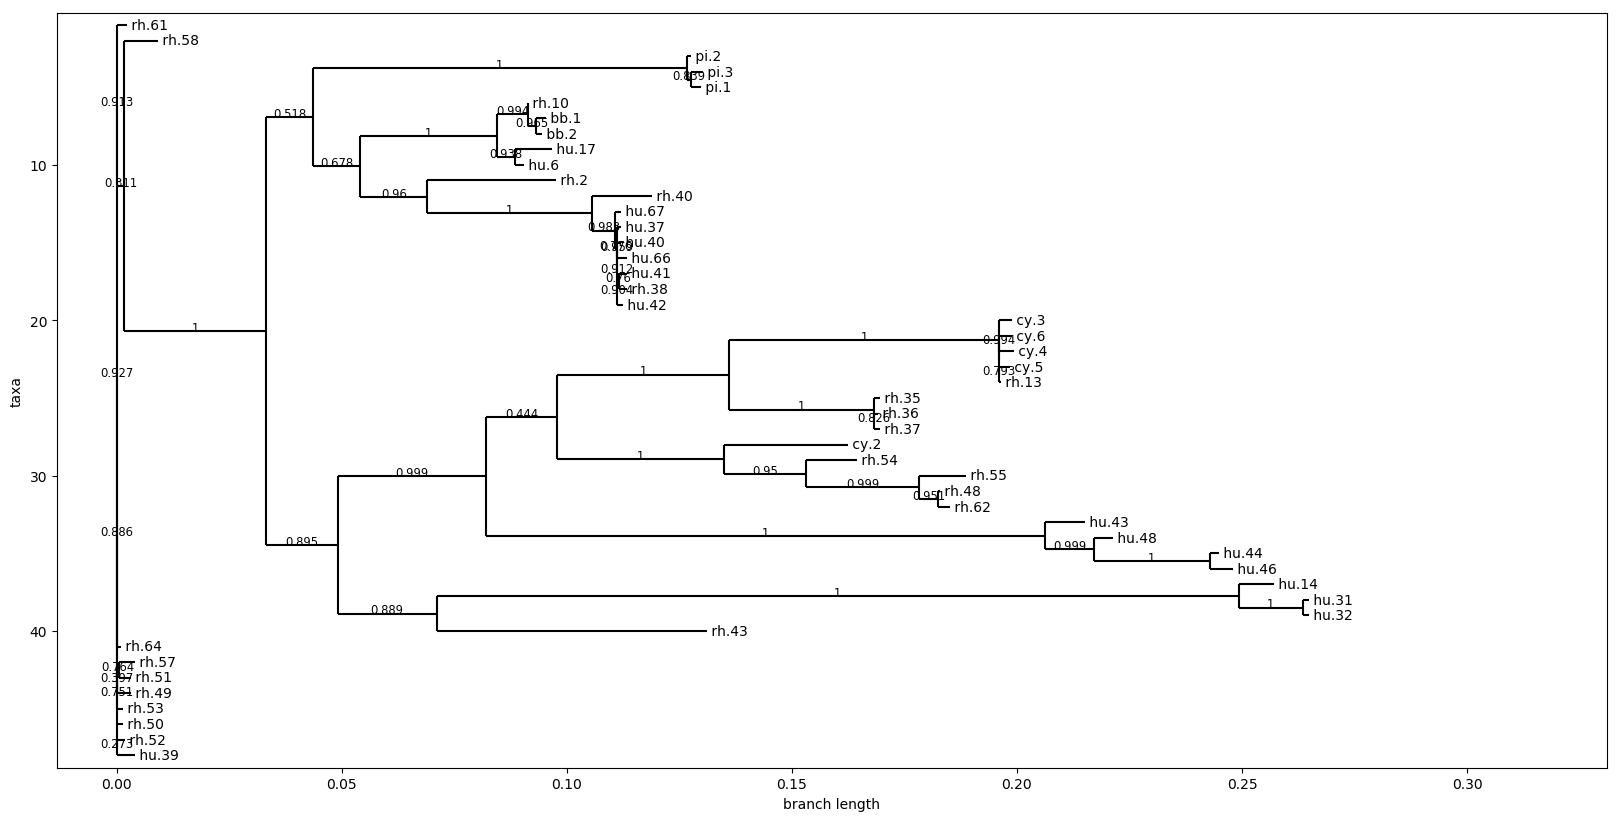

In [1]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt

%matplotlib inline
from Bio import Phylo
from io import StringIO

fig = plt.figure(figsize=(20, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
tree = Phylo.read("tree.nwk", "newick")
Phylo.draw(tree, axes=axes)

In [2]:
print (tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=6e-09, confidence=0.886)
            Clade(branch_length=5e-09, confidence=0.927)
                Clade(branch_length=5e-09, confidence=0.913)
                    Clade(branch_length=0.002260478, name='rh.61')
                    Clade(branch_length=0.001726521, confidence=0.311)
                        Clade(branch_length=0.00739237, name='rh.58')
                        Clade(branch_length=0.031427893, confidence=1.0)
                            Clade(branch_length=0.010456104, confidence=0.518)
                                Clade(branch_length=0.083046743, confidence=1.0)
                                    Clade(branch_length=0.000922101, name='pi.2')
                                    Clade(branch_length=0.000908506, confidence=0.839)
                                        Clade(branch_length=0.00275232, name='pi.3')
                                        Clade(branch_length=0.002291146, name='pi.1')
     

### Comparing each _vaguely_ defined cluser:

I uploaded the file seqs-BLAST.fa with chosen representatives rh.61, pi.3, hu.40, cy.6, rh.55, hu.44, hu.39 (referenced from the phylogenic tree) and NCBI **nucleotide BLAST**ed it with nt/nr setting.

It seems that each branch has homology with proteins in similar families, i.e. rh, hu, pi, etc. The matches within each family have the most % identity and query cover. Branches with less distance from a common ancestor have more similar sequences. All clusters (genes) encode the AAV VP1 capsid protein, with very similar homology between all sequences. Differences in the branches seem to be due to _small_ differences in the sequences (~10% difference). 

The annotations may not be trusted due to propagating errors from automated sequencing.

# 2. GC Content for MSA of Each Cluster 

After making the phylogenetic tree, I analyzed the GC content for each cluster by separating them into the following clusters:
1. rh.61, rh.58, rh.64, rh.57 rh.51, rh.49, rh.53, rh.50, rh.52, hu.39
2. pi.3, pi.2, pi.1, rh.10, bb.1, bb.2, hu.17, hu.6, rh.2, rh.40, hu.67, hu.37, hu.40, hu.66, hu.41, rh.38, hu.42
3. cy.3, cy.6, cy.4, cy.5, rh.13, rh.35, rh.36, rh.37, cy.2, rh.54, rh.55, rh.48, rh.62, hu.43, hu.48, hu.44, hu.46, hu.14, hu.31, hu.32, rh.43

I only analyzed the first 50 bases from each MSA, for sanity's sake.

### Cluster 1 (rh.61, rh.58, rh.64, rh.57 rh.51, rh.49, rh.53, rh.50, rh.52, hu.39)

In [3]:
from Bio import AlignIO
align = AlignIO.read("seqs-Cluster1.aligned.fa", "fasta")
print(align)

SingleLetterAlphabet() alignment with 10 rows and 2238 columns
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.58
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.57
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.39
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.49
ATGGTTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.51
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.61
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.52
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.50
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.53
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.64


I then proceeded to use EMBL **Clustal Omega** to find mismatches in the MSA for Cluster 1.

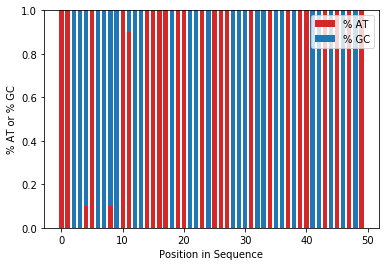

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
AT = (1.0, 1.0, 0.0, 0.0, 0.1, 1.0, 0.0, 0.0, 0.1, 0.0, 1.0, 0.9, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0)
GC = (0.0, 0.0, 1.0, 1.0, 0.9, 0.0, 1.0, 1.0, 0.9, 1.0, 0.0, 0.1, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0)

index = np.arange(N)
width = 0.7

p1 = plt.bar(index, AT, width, color='#d62728')
p2 = plt.bar(index, GC, width, bottom=AT)

plt.xlabel('Position in Sequence')
plt.ylabel('% AT or % GC')
plt.xticks((0, 10, 20, 30, 40, 50))
plt.yticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
plt.legend((p1[0], p2[0]), ('% AT', '% GC'))

plt.show()

I followed the same steps to plot the same bar graph for Clusters 2 and 3:

### Cluster 2 (pi.3, pi.2, pi.1, rh.10, bb.1, bb.2, hu.17, hu.6, rh.2, rh.40, hu.67, hu.37, hu.40, hu.66, hu.41, rh.38, hu.42)

In [5]:
from Bio import AlignIO
align = AlignIO.read("seqs-Cluster2.aligned.fa", "fasta")
print(align)

SingleLetterAlphabet() alignment with 17 rows and 2238 columns
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.3
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.1
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.2
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA bb.1
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA bb.2
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.10
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.17
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.6
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTTGAGGACAACCT...TAA rh.2
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.40
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.41
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.38
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.66
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.67
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.42
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.37
ATGGCTGCTGACGGTTATCTTCCAGATTGGCT

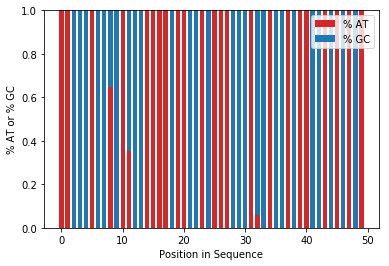

In [6]:
N = 50
AT = (1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.647, 0.0, 1.0, 0.353, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.059, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0)
GC = (0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.353, 1.0, 0.0, 0.647, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.941, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0)

index = np.arange(N)
width = 0.7

p1 = plt.bar(index, AT, width, color='#d62728')
p2 = plt.bar(index, GC, width, bottom=AT)

plt.xlabel('Position in Sequence')
plt.ylabel('% AT or % GC')
plt.xticks((0, 10, 20, 30, 40, 50))
plt.yticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
plt.legend((p1[0], p2[0]), ('% AT', '% GC'))

plt.show()

### Cluster 3 (cy.3, cy.6, cy.4, cy.5, rh.13, rh.35, rh.36, rh.37, cy.2, rh.54, rh.55, rh.48, rh.62, hu.43, hu.48, hu.44, hu.46, hu.14, hu.31, hu.32, rh.43)

In [7]:
from Bio import AlignIO
align = AlignIO.read("seqs-Cluster3.aligned.fa", "fasta")
print(align)

SingleLetterAlphabet() alignment with 21 rows and 2238 columns
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.31
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.32
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.14
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.44
ATGGCTGCCGACGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.46
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.43
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.48
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.43
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA cy.2
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.54
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.55
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.48
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.62
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.35
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.36
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.37
ATGGCTGCCGATGGTTATCTTCCAGA

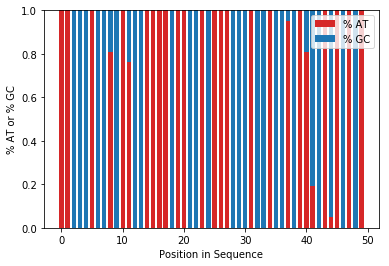

In [8]:
N = 50
AT = (1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.810, 0.0, 1.0, 0.762, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.952, 0.0, 1.0, 0.810, 0.190, 0.0, 1.0, 0.048, 1.0, 0.0, 1.0, 0.0, 1.0)
GC = (0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.190, 1.0, 0.0, 0.238, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.048, 1.0, 0.0, 0.190, 0.810, 1.0, 0.0, 0.952, 0.0, 1.0, 0.0, 1.0, 0.0)

index = np.arange(N)
width = 0.7

p1 = plt.bar(index, AT, width, color='#d62728')
p2 = plt.bar(index, GC, width, bottom=AT)

plt.xlabel('Position in Sequence')
plt.ylabel('% AT or % GC')
plt.xticks((0, 10, 20, 30, 40, 50))
plt.yticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
plt.legend((p1[0], p2[0]), ('% AT', '% GC'))

plt.show()

# 3. Sequence Length by Cluster

Finally, I made a box-and-whisker plot to represent the sequence lengths for each cluster's individual genes. Credit to [Daniel E. Cook](https://www.danielecook.com/generate-fasta-sequence-lengths/) for the awesome one-line code to generate sequence lengths from a multi-FASTA file.

In [9]:
cat seqs.fa | awk '$0 ~ ">" {print c; c=0;printf substr($0,2,100) "\t"; } $0 !~ ">" {c+=length($0);} END { print c; }'


bb.1	2217
bb.2	2217
cy.2	2214
cy.3	2187
cy.4	2187
cy.5	2187
cy.6	2187
hu.14	2211
hu.17	2217
hu.31	2211
hu.32	2211
hu.37	2217
hu.39	2217
hu.40	2217
hu.41	2217
hu.42	2217
hu.43	2214
hu.44	2211
hu.46	2211
hu.48	2211
hu.6	2217
hu.66	2217
hu.67	2217
pi.1	2196
pi.2	2196
pi.3	2196
rh.10	2217
rh.13	2187
rh.2	2217
rh.35	2190
rh.36	2190
rh.37	2190
rh.38	2217
rh.40	2217
rh.43	2211
rh.48	2214
rh.49	2217
rh.50	2217
rh.51	2217
rh.52	2217
rh.53	2217
rh.54	2214
rh.55	2214
rh.57	2217
rh.58	2217
rh.61	2217
rh.62	2214
rh.64	2217


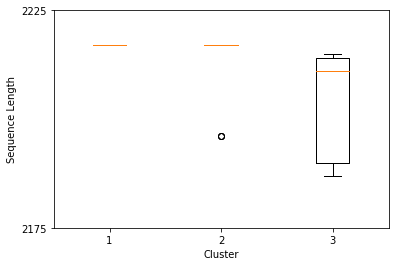

In [10]:
data = [(2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217), (2196, 2196, 2196, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217), (2187, 2187, 2187, 2187, 2187, 2190, 2190, 2190, 2214, 2214, 2214, 2214, 2214, 2215, 2211, 2211, 2211, 2211, 2211, 2211, 2211)]
line_out = plt.boxplot(data, labels=["1","2","3"])

plt.xlabel('Cluster')
plt.ylabel('Sequence Length')
plt.xticks((1, 2, 3))
plt.yticks((2175, 2225))

plt.show()